# Importing our libiraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

path = "/content/drive/MyDrive/DataSet/final_data_colors.csv"
dataset = pd.read_csv(path)
dataset = pd.get_dummies(dataset, columns=['label'])


# Preparing our DataSet


 We will split the dataset into training and testing datasets using the train_test_split function from scikit-learn. The original dataset is split into two parts, where 80% of the data is assigned to the training dataset and 20% is assigned to the testing dataset . The test_size parameter specifies the proportion of the dataset to be used for testing.

Then extract the label columns from both the training and testing datasets.

Then drop the label columns from both the training and testing datasets using the drop method with axis=1, which indicates to drop columns. The label columns are removed from train_dataset and test_dataset, leaving only the features.

The training data (train_dataset) and labels (train_labels) are converted to tensors (torch.Tensor) or arrays. This is done using the values attribute to extract the underlying NumPy arrays from the pandas DataFrame, and then converting them to tensors using torch.Tensor.

The DataLoader is responsible for loading the data in batches during training.

In [ ]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=8)

train_labels = train_dataset[['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
train_dataset = train_dataset.drop(['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White'], axis=1)
test_labels = test_dataset[['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
test_dataset = test_dataset.drop(['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White'], axis=1)


# Convert train_dataset and train_labels to tensors or arrays
train_data = torch.Tensor(train_dataset.values)
train_target = torch.Tensor(train_labels.values)

# Create TensorDataset from train_data and train_target
train_dataset = TensorDataset(train_data, train_target)

# Get the number of input and output features
input_size = train_data.shape[1]
output_size = train_target.shape[1]

# Create DataLoader using the updated train_dataset
train_dl = DataLoader(train_dataset, batch_size=1024, shuffle=True)


# Adding the Layers


The nn.Linear represents a linear transformation, mapping the input to the output using weights and biases. The dimensions of the linear layers are specified. The activation function used between each layer is RELU.

The forward method defines the forward pass of the model, where the input x goes through each layer and activation function.
x = self.relu(self.fc1(x)) applies the ReLU activation function to the output of fc1.
The same pattern is repeated for fc2, fc3, fc4, and fc5

The final output of fc5 is returned as the output of the forward pass.

In [ ]:
class ColorModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ColorModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 3)
        self.fc2 = nn.Linear(3, 24)
        self.fc3 = nn.Linear(24, 24)
        self.fc4 = nn.Linear(24, 16)
        self.fc5 = nn.Linear(16, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x


# Choosing the Loss Function ,the optimizer and the Learning rate

In [ ]:
model = ColorModel(input_size, output_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()


# Training the model

We will initialize two empty lists, losses and epochs, to store the training losses and the corresponding epochs.

The variable N is assigned to the length of the data loader (len(dl)), representing the number of batches in the data loader.

The inner loop iterates over the data loader using enumerate(dl), which returns both the batch index i and the batch data x and labels y.

Before each batch, optimizer.zero_grad() is called to zero out the gradients of the model parameters. This is necessary before performing backpropagation.

loss_value is calculated by passing the batch data x through the model and comparing the predicted output with the target labels. torch.argmax(y, dim=1) is used to convert the one-hot encoded labels y to class indices for comparison.

loss_value.backward() computes the gradients of the loss with respect to the model parameters using backpropagation.

optimizer.step() updates the model parameters based on the computed gradients.

Finally, the function returns the epochs and losses lists as NumPy arrays.

In [ ]:
def train(dl, model, loss_function, num_epochs=3000):
    losses = []
    epochs = []
    for epoch in range(num_epochs):
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{num_epochs}")
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            optimizer.zero_grad()
            loss_value = loss_function(model(x), torch.argmax(y, dim=1))
            loss_value.backward()
            optimizer.step()
            epochs.append(epoch + i/N)
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

In [ ]:
epoch_data, loss_data = train(train_dl, model, loss_function)

Epoch 0/3000
Epoch 100/3000
Epoch 200/3000
Epoch 300/3000
Epoch 400/3000
Epoch 500/3000
Epoch 600/3000
Epoch 700/3000
Epoch 800/3000
Epoch 900/3000
Epoch 1000/3000
Epoch 1100/3000
Epoch 1200/3000
Epoch 1300/3000
Epoch 1400/3000
Epoch 1500/3000
Epoch 1600/3000
Epoch 1700/3000
Epoch 1800/3000
Epoch 1900/3000
Epoch 2000/3000
Epoch 2100/3000
Epoch 2200/3000
Epoch 2300/3000
Epoch 2400/3000
Epoch 2500/3000
Epoch 2600/3000
Epoch 2700/3000
Epoch 2800/3000
Epoch 2900/3000


# Plotting the Loss



Text(0.5, 1.0, 'Cross Entropy (avgd per epoch)')

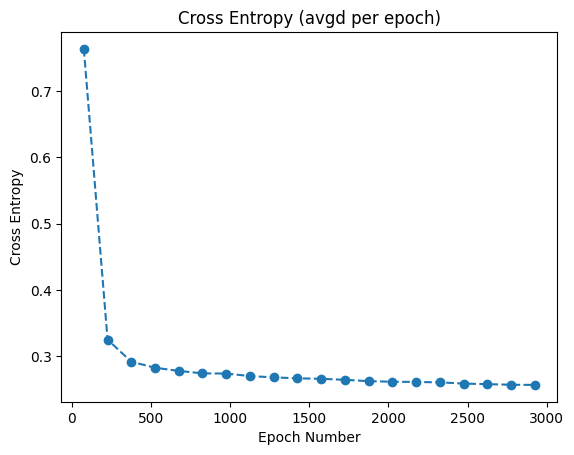

In [ ]:
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')

# Evaluation of the model and its accuracy

Calculating the accuracy

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluation
model.eval()
test_data = torch.Tensor(test_dataset.values)
test_target = torch.Tensor(test_labels.values)

# Predict labels for test data
with torch.no_grad():
    predictions = model(test_data)
    predicted_labels = torch.argmax(predictions, dim=1).numpy()

# Calculate accuracy
true_labels = torch.argmax(test_target, dim=1).numpy()
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy*100}')

Accuracy: 87.73491592482691


Classification Report

In [ ]:
# Print classification report
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
classification_rep = classification_report(true_labels, predicted_labels, target_names=target_names)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         Red       0.79      0.76      0.78        50
       Green       0.93      0.95      0.94       294
        Blue       0.93      0.93      0.93       224
      Yellow       0.85      0.81      0.83        57
      Orange       0.86      0.65      0.74        37
        Pink       0.83      0.89      0.86       120
      Purple       0.83      0.79      0.81       104
       Brown       0.81      0.86      0.84        77
        Grey       0.71      0.69      0.70        29
       Black       0.92      0.86      0.89        14
       White       0.67      0.80      0.73         5

    accuracy                           0.88      1011
   macro avg       0.83      0.82      0.82      1011
weighted avg       0.88      0.88      0.88      1011



Confusion Matrix

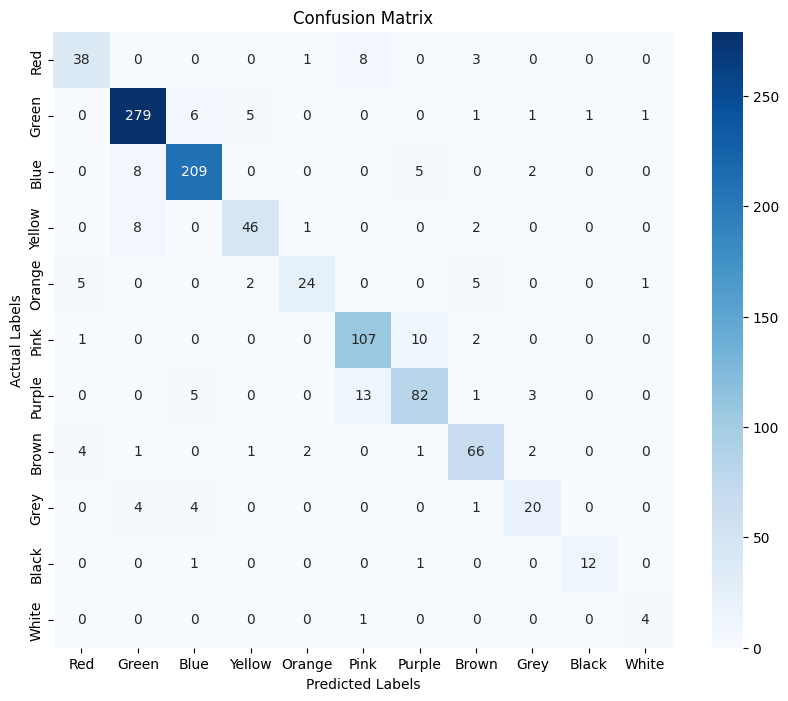

In [ ]:
import seaborn as sns
# Print confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()